In [202]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
plt.style.use('fivethirtyeight')

from kirin import Kirin

In [203]:
t = np.array([[[0, 1, 2], [3, 4, 5]],
              [[6, 7, 8], [9, 10, 11]]])

ft = torch.FloatTensor(t)

In [204]:
print(ft.shape)

torch.Size([2, 2, 3])


In [205]:
class MultiVariateRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
        
    def forward(self, x):
        return self.linear(x)

In [206]:
model = MultiVariateRegressionModel()

In [207]:
x = torch.FloatTensor([[1], [2], [3]])
y = torch.FloatTensor([[4], [5], [6]])

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [208]:
nb_epoch = 2000
cost_ls = []
for epoch in range(nb_epoch + 1):
    
    prediction = model(x)
    
    cost = torch.nn.functional.mse_loss(prediction, y)
    
    optimizer.zero_grad()
    
    cost.backward()
    
    optimizer.step()
    
    cost_ls.append(cost)
    
    if epoch % 100 == 0:
        print(f'=================\nEpoch: {epoch} \nCost: {cost} \n')

Epoch: 0 
Cost: 9.549691200256348 

Epoch: 100 
Cost: 0.3490940034389496 

Epoch: 200 
Cost: 0.21571888029575348 

Epoch: 300 
Cost: 0.13330131769180298 

Epoch: 400 
Cost: 0.08237233012914658 

Epoch: 500 
Cost: 0.05090106651186943 

Epoch: 600 
Cost: 0.03145371004939079 

Epoch: 700 
Cost: 0.01943652145564556 

Epoch: 800 
Cost: 0.012010584585368633 

Epoch: 900 
Cost: 0.007421858608722687 

Epoch: 1000 
Cost: 0.004586278926581144 

Epoch: 1100 
Cost: 0.002834038808941841 

Epoch: 1200 
Cost: 0.0017512575723230839 

Epoch: 1300 
Cost: 0.0010821857722476125 

Epoch: 1400 
Cost: 0.0006686887354589999 

Epoch: 1500 
Cost: 0.00041321548633277416 

Epoch: 1600 
Cost: 0.0002553480153437704 

Epoch: 1700 
Cost: 0.00015779559907969087 

Epoch: 1800 
Cost: 9.750614844961092e-05 

Epoch: 1900 
Cost: 6.0252845287323e-05 

Epoch: 2000 
Cost: 3.7232806789688766e-05 



Text(0.5, 0, 'Cost')

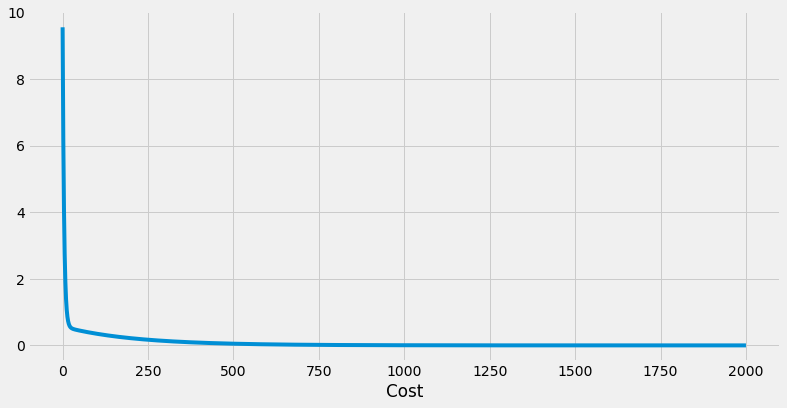

In [209]:
plt.figure(figsize=(12, 6))

plt.plot(cost_ls)
plt.xlabel('Epoch')
plt.xlabel('Cost')

### DataLoader

In [240]:
from torch.utils.data import TensorDataset, DataLoader

In [241]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [242]:
dataset = TensorDataset(x_train, y_train)
loader = DataLoader(dataset, batch_size=2, shuffle=True)

In [243]:
model = nn.Linear(3, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [244]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(loader):

        x_train, y_train = samples
        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(loader),
            cost.item()
            ))

Epoch    0/20 Batch 1/3 Cost: 73798.656250
Epoch    0/20 Batch 2/3 Cost: 17871.396484
Epoch    0/20 Batch 3/3 Cost: 8747.455078
Epoch    1/20 Batch 1/3 Cost: 1782.827148
Epoch    1/20 Batch 2/3 Cost: 796.591370
Epoch    1/20 Batch 3/3 Cost: 88.050346
Epoch    2/20 Batch 1/3 Cost: 75.145935
Epoch    2/20 Batch 2/3 Cost: 15.170080
Epoch    2/20 Batch 3/3 Cost: 9.983116
Epoch    3/20 Batch 1/3 Cost: 1.565120
Epoch    3/20 Batch 2/3 Cost: 0.358168
Epoch    3/20 Batch 3/3 Cost: 0.896734
Epoch    4/20 Batch 1/3 Cost: 0.193273
Epoch    4/20 Batch 2/3 Cost: 0.043063
Epoch    4/20 Batch 3/3 Cost: 0.476925
Epoch    5/20 Batch 1/3 Cost: 0.323804
Epoch    5/20 Batch 2/3 Cost: 0.066971
Epoch    5/20 Batch 3/3 Cost: 0.410439
Epoch    6/20 Batch 1/3 Cost: 0.059328
Epoch    6/20 Batch 2/3 Cost: 0.581069
Epoch    6/20 Batch 3/3 Cost: 0.004892
Epoch    7/20 Batch 1/3 Cost: 0.182172
Epoch    7/20 Batch 2/3 Cost: 0.259012
Epoch    7/20 Batch 3/3 Cost: 0.001123
Epoch    8/20 Batch 1/3 Cost: 0.068606
Epoch 

In [245]:
new_var =  torch.FloatTensor([[73, 80, 75]]) 
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.5818]], grad_fn=<AddmmBackward>)


### Custom Dataset

In [511]:
from torch.utils.data import Dataset, DataLoader

import torch.nn.functional as F

In [512]:
x_train = torch.FloatTensor([[73, 80, 75],
                               [93, 88, 93],
                               [89, 91, 90],
                               [96, 98, 100],
                               [73, 66, 70]])

y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [513]:
class CustomDataSet(torch.utils.data.Dataset):
    def __init__(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
    def __len__(self):
        return len(self.x_train)
    def __getitem__(self, idx):
        x = self.x_train[idx]
        y = self.y_train[idx]
        
        return x, y

In [514]:
dataset = CustomDataSet(x_train, y_train)
loader = DataLoader(dataset, batch_size=2, shuffle=True)

In [515]:
model = nn.Linear(3, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.0000001)

In [517]:
nb_epochs = 2000
cost_ls = []
for epoch in range(nb_epochs):
    for batch_idx, samples in enumerate(loader):
        
        x_data, y_data = samples
        print(x_data)
        prediction = model(x_data)
        
        cost = F.mse_loss(prediction, y_data)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
    cost_ls.append(cost)

tensor([[ 93.,  88.,  93.],
        [ 96.,  98., 100.]])
tensor([[73., 80., 75.],
        [73., 66., 70.]])
tensor([[89., 91., 90.]])
tensor([[89., 91., 90.],
        [73., 66., 70.]])
tensor([[93., 88., 93.],
        [73., 80., 75.]])
tensor([[ 96.,  98., 100.]])
tensor([[73., 66., 70.],
        [93., 88., 93.]])
tensor([[ 89.,  91.,  90.],
        [ 96.,  98., 100.]])
tensor([[73., 80., 75.]])
tensor([[89., 91., 90.],
        [73., 80., 75.]])
tensor([[73., 66., 70.],
        [93., 88., 93.]])
tensor([[ 96.,  98., 100.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  66.,  70.]])
tensor([[89., 91., 90.],
        [93., 88., 93.]])
tensor([[73., 80., 75.]])
tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]])
tensor([[93., 88., 93.],
        [89., 91., 90.]])
tensor([[73., 80., 75.]])
tensor([[ 89.,  91.,  90.],
        [ 96.,  98., 100.]])
tensor([[73., 80., 75.],
        [93., 88., 93.]])
tensor([[73., 66., 70.]])
tensor([[93., 88., 93.],
        [73., 80., 75.]])
tensor([[ 89.,  9

tensor([[93., 88., 93.],
        [89., 91., 90.]])
tensor([[ 96.,  98., 100.]])
tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]])
tensor([[93., 88., 93.],
        [89., 91., 90.]])
tensor([[73., 80., 75.]])
tensor([[73., 80., 75.],
        [89., 91., 90.]])
tensor([[73., 66., 70.],
        [93., 88., 93.]])
tensor([[ 96.,  98., 100.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  80.,  75.]])
tensor([[93., 88., 93.],
        [89., 91., 90.]])
tensor([[73., 66., 70.]])
tensor([[89., 91., 90.],
        [73., 66., 70.]])
tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]])
tensor([[93., 88., 93.]])
tensor([[89., 91., 90.],
        [73., 66., 70.]])
tensor([[73., 80., 75.],
        [93., 88., 93.]])
tensor([[ 96.,  98., 100.]])
tensor([[73., 66., 70.],
        [93., 88., 93.]])
tensor([[73., 80., 75.],
        [89., 91., 90.]])
tensor([[ 96.,  98., 100.]])
tensor([[89., 91., 90.],
        [73., 80., 75.]])
tensor([[ 93.,  88.,  93.],
        [ 96.,  98., 100.]])
tensor([[73., 66.

        [ 73.,  66.,  70.]])
tensor([[93., 88., 93.]])
tensor([[73., 66., 70.],
        [89., 91., 90.]])
tensor([[93., 88., 93.],
        [73., 80., 75.]])
tensor([[ 96.,  98., 100.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  66.,  70.]])
tensor([[73., 80., 75.],
        [89., 91., 90.]])
tensor([[93., 88., 93.]])
tensor([[73., 80., 75.],
        [89., 91., 90.]])
tensor([[ 93.,  88.,  93.],
        [ 96.,  98., 100.]])
tensor([[73., 66., 70.]])
tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]])
tensor([[93., 88., 93.],
        [89., 91., 90.]])
tensor([[73., 66., 70.]])
tensor([[ 96.,  98., 100.],
        [ 93.,  88.,  93.]])
tensor([[73., 80., 75.],
        [73., 66., 70.]])
tensor([[89., 91., 90.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  80.,  75.]])
tensor([[93., 88., 93.],
        [89., 91., 90.]])
tensor([[73., 66., 70.]])
tensor([[ 96.,  98., 100.],
        [ 93.,  88.,  93.]])
tensor([[73., 80., 75.],
        [73., 66., 70.]])
tensor([[89., 91., 90.]])
tensor([[ 

        [ 96.,  98., 100.]])
tensor([[73., 66., 70.],
        [73., 80., 75.]])
tensor([[93., 88., 93.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  80.,  75.]])
tensor([[89., 91., 90.],
        [93., 88., 93.]])
tensor([[73., 66., 70.]])
tensor([[93., 88., 93.],
        [73., 80., 75.]])
tensor([[ 89.,  91.,  90.],
        [ 96.,  98., 100.]])
tensor([[73., 66., 70.]])
tensor([[73., 66., 70.],
        [73., 80., 75.]])
tensor([[93., 88., 93.],
        [89., 91., 90.]])
tensor([[ 96.,  98., 100.]])
tensor([[ 96.,  98., 100.],
        [ 93.,  88.,  93.]])
tensor([[73., 66., 70.],
        [89., 91., 90.]])
tensor([[73., 80., 75.]])
tensor([[93., 88., 93.],
        [89., 91., 90.]])
tensor([[73., 80., 75.],
        [73., 66., 70.]])
tensor([[ 96.,  98., 100.]])
tensor([[89., 91., 90.],
        [73., 66., 70.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  80.,  75.]])
tensor([[93., 88., 93.]])
tensor([[89., 91., 90.],
        [93., 88., 93.]])
tensor([[ 73.,  80.,  75.],
        [ 96.,  9

        [73., 66., 70.]])
tensor([[73., 80., 75.],
        [89., 91., 90.]])
tensor([[ 96.,  98., 100.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  66.,  70.]])
tensor([[73., 80., 75.],
        [93., 88., 93.]])
tensor([[89., 91., 90.]])
tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]])
tensor([[73., 80., 75.],
        [93., 88., 93.]])
tensor([[89., 91., 90.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  80.,  75.]])
tensor([[89., 91., 90.],
        [73., 66., 70.]])
tensor([[93., 88., 93.]])
tensor([[ 89.,  91.,  90.],
        [ 96.,  98., 100.]])
tensor([[73., 80., 75.],
        [73., 66., 70.]])
tensor([[93., 88., 93.]])
tensor([[ 96.,  98., 100.],
        [ 93.,  88.,  93.]])
tensor([[89., 91., 90.],
        [73., 66., 70.]])
tensor([[73., 80., 75.]])
tensor([[73., 66., 70.],
        [89., 91., 90.]])
tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]])
tensor([[93., 88., 93.]])
tensor([[ 96.,  98., 100.],
        [ 93.,  88.,  93.]])
tensor([[73., 66., 70.],
        

        [89., 91., 90.]])
tensor([[93., 88., 93.]])
tensor([[73., 66., 70.],
        [89., 91., 90.]])
tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]])
tensor([[93., 88., 93.]])
tensor([[89., 91., 90.],
        [93., 88., 93.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  80.,  75.]])
tensor([[73., 66., 70.]])
tensor([[89., 91., 90.],
        [73., 80., 75.]])
tensor([[73., 66., 70.],
        [93., 88., 93.]])
tensor([[ 96.,  98., 100.]])
tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]])
tensor([[89., 91., 90.],
        [73., 80., 75.]])
tensor([[93., 88., 93.]])
tensor([[ 96.,  98., 100.],
        [ 89.,  91.,  90.]])
tensor([[73., 80., 75.],
        [73., 66., 70.]])
tensor([[93., 88., 93.]])
tensor([[ 96.,  98., 100.],
        [ 93.,  88.,  93.]])
tensor([[73., 66., 70.],
        [89., 91., 90.]])
tensor([[73., 80., 75.]])
tensor([[73., 66., 70.],
        [93., 88., 93.]])
tensor([[ 89.,  91.,  90.],
        [ 96.,  98., 100.]])
tensor([[73., 80., 75.]])
tensor([[ 93.

        [ 89.,  91.,  90.]])
tensor([[93., 88., 93.]])
tensor([[ 93.,  88.,  93.],
        [ 96.,  98., 100.]])
tensor([[73., 66., 70.],
        [89., 91., 90.]])
tensor([[73., 80., 75.]])
tensor([[73., 80., 75.],
        [73., 66., 70.]])
tensor([[ 96.,  98., 100.],
        [ 89.,  91.,  90.]])
tensor([[93., 88., 93.]])
tensor([[73., 80., 75.],
        [89., 91., 90.]])
tensor([[ 96.,  98., 100.],
        [ 93.,  88.,  93.]])
tensor([[73., 66., 70.]])
tensor([[89., 91., 90.],
        [73., 66., 70.]])
tensor([[ 96.,  98., 100.],
        [ 93.,  88.,  93.]])
tensor([[73., 80., 75.]])
tensor([[89., 91., 90.],
        [73., 80., 75.]])
tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]])
tensor([[93., 88., 93.]])
tensor([[ 96.,  98., 100.],
        [ 93.,  88.,  93.]])
tensor([[89., 91., 90.],
        [73., 80., 75.]])
tensor([[73., 66., 70.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  66.,  70.]])
tensor([[89., 91., 90.],
        [73., 80., 75.]])
tensor([[93., 88., 93.]])
tensor(

        [89., 91., 90.]])
tensor([[93., 88., 93.]])
tensor([[73., 66., 70.],
        [89., 91., 90.]])
tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]])
tensor([[93., 88., 93.]])
tensor([[ 93.,  88.,  93.],
        [ 96.,  98., 100.]])
tensor([[73., 80., 75.],
        [73., 66., 70.]])
tensor([[89., 91., 90.]])
tensor([[93., 88., 93.],
        [73., 66., 70.]])
tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]])
tensor([[89., 91., 90.]])
tensor([[ 89.,  91.,  90.],
        [ 96.,  98., 100.]])
tensor([[93., 88., 93.],
        [73., 66., 70.]])
tensor([[73., 80., 75.]])
tensor([[93., 88., 93.],
        [73., 66., 70.]])
tensor([[73., 80., 75.],
        [89., 91., 90.]])
tensor([[ 96.,  98., 100.]])
tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]])
tensor([[89., 91., 90.],
        [93., 88., 93.]])
tensor([[73., 66., 70.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  80.,  75.]])
tensor([[73., 66., 70.],
        [89., 91., 90.]])
tensor([[93., 88., 93.]])
tensor([[ 96.

tensor([[89., 91., 90.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  66.,  70.]])
tensor([[73., 80., 75.],
        [93., 88., 93.]])
tensor([[89., 91., 90.]])
tensor([[89., 91., 90.],
        [73., 66., 70.]])
tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]])
tensor([[93., 88., 93.]])
tensor([[89., 91., 90.],
        [73., 80., 75.]])
tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]])
tensor([[93., 88., 93.]])
tensor([[ 89.,  91.,  90.],
        [ 96.,  98., 100.]])
tensor([[73., 66., 70.],
        [73., 80., 75.]])
tensor([[93., 88., 93.]])
tensor([[93., 88., 93.],
        [89., 91., 90.]])
tensor([[73., 80., 75.],
        [73., 66., 70.]])
tensor([[ 96.,  98., 100.]])
tensor([[ 96.,  98., 100.],
        [ 89.,  91.,  90.]])
tensor([[73., 80., 75.],
        [93., 88., 93.]])
tensor([[73., 66., 70.]])
tensor([[73., 66., 70.],
        [93., 88., 93.]])
tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]])
tensor([[89., 91., 90.]])
tensor([[93., 88., 93.],
        [73., 

        [73., 80., 75.]])
tensor([[ 96.,  98., 100.],
        [ 93.,  88.,  93.]])
tensor([[89., 91., 90.]])
tensor([[89., 91., 90.],
        [93., 88., 93.]])
tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]])
tensor([[73., 80., 75.]])
tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]])
tensor([[93., 88., 93.],
        [73., 66., 70.]])
tensor([[89., 91., 90.]])
tensor([[73., 80., 75.],
        [93., 88., 93.]])
tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]])
tensor([[89., 91., 90.]])
tensor([[73., 66., 70.],
        [89., 91., 90.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  80.,  75.]])
tensor([[93., 88., 93.]])
tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]])
tensor([[93., 88., 93.],
        [73., 66., 70.]])
tensor([[89., 91., 90.]])
tensor([[73., 66., 70.],
        [73., 80., 75.]])
tensor([[ 96.,  98., 100.],
        [ 89.,  91.,  90.]])
tensor([[93., 88., 93.]])
tensor([[93., 88., 93.],
        [73., 80., 75.]])
tensor([[ 96.,  98., 100.],
        

        [ 96.,  98., 100.]])
tensor([[93., 88., 93.],
        [73., 66., 70.]])
tensor([[73., 80., 75.]])
tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]])
tensor([[93., 88., 93.],
        [89., 91., 90.]])
tensor([[73., 66., 70.]])
tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]])
tensor([[73., 66., 70.],
        [93., 88., 93.]])
tensor([[89., 91., 90.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  66.,  70.]])
tensor([[89., 91., 90.],
        [73., 80., 75.]])
tensor([[93., 88., 93.]])
tensor([[73., 80., 75.],
        [73., 66., 70.]])
tensor([[ 93.,  88.,  93.],
        [ 96.,  98., 100.]])
tensor([[89., 91., 90.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  80.,  75.]])
tensor([[89., 91., 90.],
        [73., 66., 70.]])
tensor([[93., 88., 93.]])
tensor([[93., 88., 93.],
        [73., 66., 70.]])
tensor([[89., 91., 90.],
        [73., 80., 75.]])
tensor([[ 96.,  98., 100.]])
tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]])
tensor([[73., 80., 75.],
        [89

        [ 96.,  98., 100.]])
tensor([[89., 91., 90.],
        [73., 80., 75.]])
tensor([[73., 66., 70.]])
tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]])
tensor([[93., 88., 93.],
        [73., 80., 75.]])
tensor([[89., 91., 90.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  80.,  75.]])
tensor([[73., 66., 70.],
        [93., 88., 93.]])
tensor([[89., 91., 90.]])
tensor([[ 93.,  88.,  93.],
        [ 96.,  98., 100.]])
tensor([[73., 66., 70.],
        [73., 80., 75.]])
tensor([[89., 91., 90.]])
tensor([[ 96.,  98., 100.],
        [ 89.,  91.,  90.]])
tensor([[73., 80., 75.],
        [73., 66., 70.]])
tensor([[93., 88., 93.]])
tensor([[ 93.,  88.,  93.],
        [ 96.,  98., 100.]])
tensor([[73., 66., 70.],
        [89., 91., 90.]])
tensor([[73., 80., 75.]])
tensor([[73., 80., 75.],
        [89., 91., 90.]])
tensor([[93., 88., 93.],
        [73., 66., 70.]])
tensor([[ 96.,  98., 100.]])
tensor([[ 93.,  88.,  93.],
        [ 96.,  98., 100.]])
tensor([[73., 80., 75.],
        [73

        [93., 88., 93.]])
tensor([[89., 91., 90.],
        [73., 80., 75.]])
tensor([[ 96.,  98., 100.]])
tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]])
tensor([[93., 88., 93.],
        [89., 91., 90.]])
tensor([[73., 66., 70.]])
tensor([[89., 91., 90.],
        [73., 66., 70.]])
tensor([[ 96.,  98., 100.],
        [ 93.,  88.,  93.]])
tensor([[73., 80., 75.]])
tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]])
tensor([[89., 91., 90.],
        [73., 66., 70.]])
tensor([[93., 88., 93.]])
tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]])
tensor([[73., 80., 75.],
        [89., 91., 90.]])
tensor([[93., 88., 93.]])
tensor([[ 93.,  88.,  93.],
        [ 96.,  98., 100.]])
tensor([[89., 91., 90.],
        [73., 66., 70.]])
tensor([[73., 80., 75.]])
tensor([[73., 66., 70.],
        [73., 80., 75.]])
tensor([[ 96.,  98., 100.],
        [ 93.,  88.,  93.]])
tensor([[89., 91., 90.]])
tensor([[93., 88., 93.],
        [73., 66., 70.]])
tensor([[ 89.,  91.,  90.],
        [ 9

tensor([[ 96.,  98., 100.]])
tensor([[89., 91., 90.],
        [73., 66., 70.]])
tensor([[73., 80., 75.],
        [93., 88., 93.]])
tensor([[ 96.,  98., 100.]])
tensor([[89., 91., 90.],
        [93., 88., 93.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  66.,  70.]])
tensor([[73., 80., 75.]])
tensor([[ 89.,  91.,  90.],
        [ 96.,  98., 100.]])
tensor([[93., 88., 93.],
        [73., 80., 75.]])
tensor([[73., 66., 70.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  80.,  75.]])
tensor([[73., 66., 70.],
        [89., 91., 90.]])
tensor([[93., 88., 93.]])
tensor([[73., 66., 70.],
        [93., 88., 93.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  80.,  75.]])
tensor([[89., 91., 90.]])
tensor([[93., 88., 93.],
        [73., 66., 70.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  80.,  75.]])
tensor([[89., 91., 90.]])
tensor([[ 96.,  98., 100.],
        [ 89.,  91.,  90.]])
tensor([[93., 88., 93.],
        [73., 66., 70.]])
tensor([[73., 80., 75.]])
tensor([[ 89.,  91.,  90.],
        

        [ 96.,  98., 100.]])
tensor([[89., 91., 90.],
        [73., 80., 75.]])
tensor([[93., 88., 93.]])
tensor([[73., 80., 75.],
        [89., 91., 90.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  66.,  70.]])
tensor([[93., 88., 93.]])
tensor([[ 96.,  98., 100.],
        [ 93.,  88.,  93.]])
tensor([[73., 80., 75.],
        [89., 91., 90.]])
tensor([[73., 66., 70.]])
tensor([[ 89.,  91.,  90.],
        [ 96.,  98., 100.]])
tensor([[73., 66., 70.],
        [93., 88., 93.]])
tensor([[73., 80., 75.]])
tensor([[93., 88., 93.],
        [73., 80., 75.]])
tensor([[73., 66., 70.],
        [89., 91., 90.]])
tensor([[ 96.,  98., 100.]])
tensor([[93., 88., 93.],
        [73., 80., 75.]])
tensor([[73., 66., 70.],
        [89., 91., 90.]])
tensor([[ 96.,  98., 100.]])
tensor([[73., 80., 75.],
        [73., 66., 70.]])
tensor([[93., 88., 93.],
        [89., 91., 90.]])
tensor([[ 96.,  98., 100.]])
tensor([[ 96.,  98., 100.],
        [ 89.,  91.,  90.]])
tensor([[73., 66., 70.],
        [93., 88.

        [73., 66., 70.]])
tensor([[ 96.,  98., 100.]])
tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]])
tensor([[89., 91., 90.],
        [73., 80., 75.]])
tensor([[93., 88., 93.]])
tensor([[73., 80., 75.],
        [93., 88., 93.]])
tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]])
tensor([[89., 91., 90.]])
tensor([[93., 88., 93.],
        [89., 91., 90.]])
tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]])
tensor([[73., 80., 75.]])
tensor([[89., 91., 90.],
        [73., 80., 75.]])
tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]])
tensor([[93., 88., 93.]])
tensor([[89., 91., 90.],
        [73., 80., 75.]])
tensor([[ 96.,  98., 100.],
        [ 93.,  88.,  93.]])
tensor([[73., 66., 70.]])
tensor([[93., 88., 93.],
        [73., 80., 75.]])
tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]])
tensor([[89., 91., 90.]])
tensor([[ 93.,  88.,  93.],
        [ 96.,  98., 100.]])
tensor([[89., 91., 90.],
        [73., 66., 70.]])
tensor([[73., 80., 75.]])
tensor(

        [ 96.,  98., 100.]])
tensor([[73., 66., 70.]])
tensor([[93., 88., 93.],
        [89., 91., 90.]])
tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]])
tensor([[73., 66., 70.]])
tensor([[93., 88., 93.],
        [73., 66., 70.]])
tensor([[89., 91., 90.],
        [73., 80., 75.]])
tensor([[ 96.,  98., 100.]])
tensor([[73., 80., 75.],
        [93., 88., 93.]])
tensor([[89., 91., 90.],
        [73., 66., 70.]])
tensor([[ 96.,  98., 100.]])
tensor([[93., 88., 93.],
        [89., 91., 90.]])
tensor([[73., 66., 70.],
        [73., 80., 75.]])
tensor([[ 96.,  98., 100.]])
tensor([[ 89.,  91.,  90.],
        [ 96.,  98., 100.]])
tensor([[73., 80., 75.],
        [73., 66., 70.]])
tensor([[93., 88., 93.]])
tensor([[ 96.,  98., 100.],
        [ 89.,  91.,  90.]])
tensor([[73., 80., 75.],
        [93., 88., 93.]])
tensor([[73., 66., 70.]])
tensor([[89., 91., 90.],
        [93., 88., 93.]])
tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]])
tensor([[73., 66., 70.]])
tensor([[73., 66

tensor([[ 96.,  98., 100.],
        [ 93.,  88.,  93.]])
tensor([[89., 91., 90.]])
tensor([[89., 91., 90.],
        [73., 80., 75.]])
tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]])
tensor([[93., 88., 93.]])
tensor([[89., 91., 90.],
        [93., 88., 93.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  66.,  70.]])
tensor([[73., 80., 75.]])
tensor([[73., 80., 75.],
        [89., 91., 90.]])
tensor([[ 93.,  88.,  93.],
        [ 96.,  98., 100.]])
tensor([[73., 66., 70.]])
tensor([[ 93.,  88.,  93.],
        [ 96.,  98., 100.]])
tensor([[89., 91., 90.],
        [73., 66., 70.]])
tensor([[73., 80., 75.]])
tensor([[93., 88., 93.],
        [89., 91., 90.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  80.,  75.]])
tensor([[73., 66., 70.]])
tensor([[93., 88., 93.],
        [73., 80., 75.]])
tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]])
tensor([[89., 91., 90.]])
tensor([[73., 80., 75.],
        [89., 91., 90.]])
tensor([[ 96.,  98., 100.],
        [ 93.,  88.,  93.]])
tenso

tensor([[73., 80., 75.],
        [89., 91., 90.]])
tensor([[73., 66., 70.]])
tensor([[89., 91., 90.],
        [73., 66., 70.]])
tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]])
tensor([[93., 88., 93.]])
tensor([[89., 91., 90.],
        [73., 80., 75.]])
tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]])
tensor([[93., 88., 93.]])
tensor([[73., 66., 70.],
        [73., 80., 75.]])
tensor([[ 96.,  98., 100.],
        [ 93.,  88.,  93.]])
tensor([[89., 91., 90.]])
tensor([[73., 66., 70.],
        [73., 80., 75.]])
tensor([[ 93.,  88.,  93.],
        [ 96.,  98., 100.]])
tensor([[89., 91., 90.]])
tensor([[93., 88., 93.],
        [89., 91., 90.]])
tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]])
tensor([[73., 66., 70.]])
tensor([[73., 80., 75.],
        [93., 88., 93.]])
tensor([[89., 91., 90.],
        [73., 66., 70.]])
tensor([[ 96.,  98., 100.]])
tensor([[93., 88., 93.],
        [73., 66., 70.]])
tensor([[ 89.,  91.,  90.],
        [ 96.,  98., 100.]])
tensor([[73., 

        [93., 88., 93.]])
tensor([[ 96.,  98., 100.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  80.,  75.]])
tensor([[89., 91., 90.],
        [93., 88., 93.]])
tensor([[73., 66., 70.]])
tensor([[73., 66., 70.],
        [93., 88., 93.]])
tensor([[ 96.,  98., 100.],
        [ 73.,  80.,  75.]])
tensor([[89., 91., 90.]])
tensor([[73., 80., 75.],
        [73., 66., 70.]])
tensor([[89., 91., 90.],
        [93., 88., 93.]])
tensor([[ 96.,  98., 100.]])
tensor([[89., 91., 90.],
        [93., 88., 93.]])
tensor([[73., 80., 75.],
        [73., 66., 70.]])
tensor([[ 96.,  98., 100.]])
tensor([[73., 80., 75.],
        [73., 66., 70.]])
tensor([[89., 91., 90.],
        [93., 88., 93.]])
tensor([[ 96.,  98., 100.]])
tensor([[93., 88., 93.],
        [89., 91., 90.]])
tensor([[73., 66., 70.],
        [73., 80., 75.]])
tensor([[ 96.,  98., 100.]])
tensor([[93., 88., 93.],
        [73., 66., 70.]])
tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]])
tensor([[89., 91., 90.]])
tensor([[73., 66., 

tensor([[73., 80., 75.],
        [73., 66., 70.]])
tensor([[89., 91., 90.],
        [93., 88., 93.]])
tensor([[ 96.,  98., 100.]])
tensor([[93., 88., 93.],
        [89., 91., 90.]])
tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]])
tensor([[73., 80., 75.]])
tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]])
tensor([[73., 66., 70.],
        [93., 88., 93.]])
tensor([[89., 91., 90.]])
tensor([[ 96.,  98., 100.],
        [ 93.,  88.,  93.]])
tensor([[89., 91., 90.],
        [73., 80., 75.]])
tensor([[73., 66., 70.]])
tensor([[ 96.,  98., 100.],
        [ 89.,  91.,  90.]])
tensor([[73., 66., 70.],
        [93., 88., 93.]])
tensor([[73., 80., 75.]])
tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]])
tensor([[89., 91., 90.],
        [93., 88., 93.]])
tensor([[73., 80., 75.]])
tensor([[ 96.,  98., 100.],
        [ 93.,  88.,  93.]])
tensor([[73., 66., 70.],
        [73., 80., 75.]])
tensor([[89., 91., 90.]])
tensor([[93., 88., 93.],
        [73., 66., 70.]])
tensor([[ 89.,

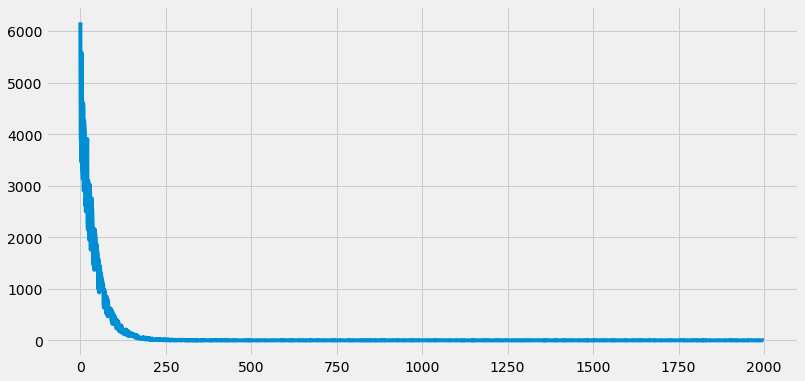

In [270]:
plt.figure(figsize=(12, 6))
plt.plot(cost_ls)

In [272]:
model(torch.FloatTensor([[73, 80, 75]]) )

tensor([[152.5713]], grad_fn=<AddmmBackward>)

### Logistic

In [273]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [274]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

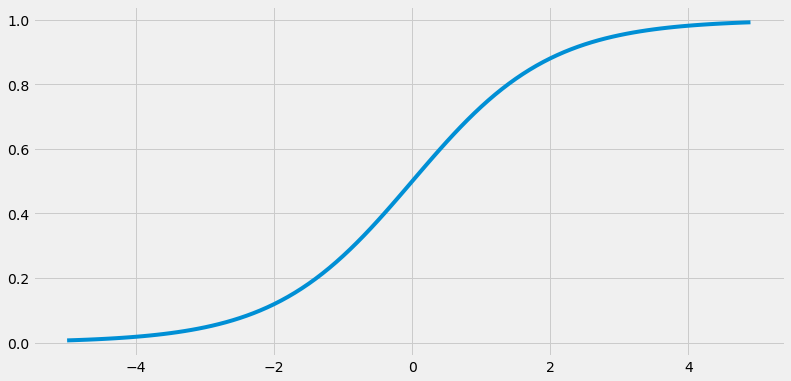

In [280]:
plt.figure(figsize=(12, 6))
plt.plot(x, y)

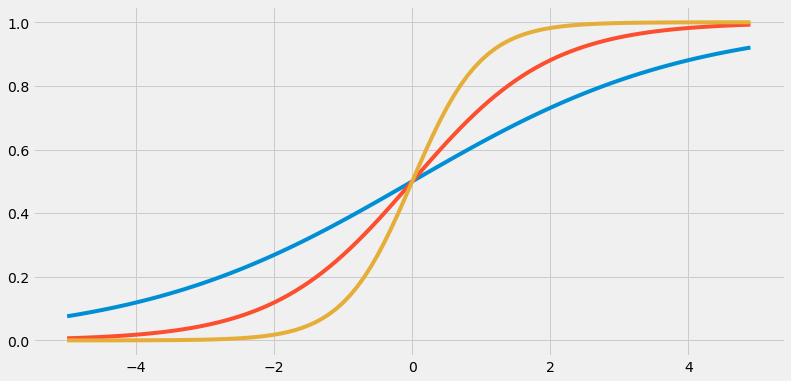

In [283]:
plt.figure(figsize=(12, 6))


y_1 = sigmoid(0.5 * x)
y_2 = sigmoid(1 * x)
y_3 = sigmoid(2 * x)

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)

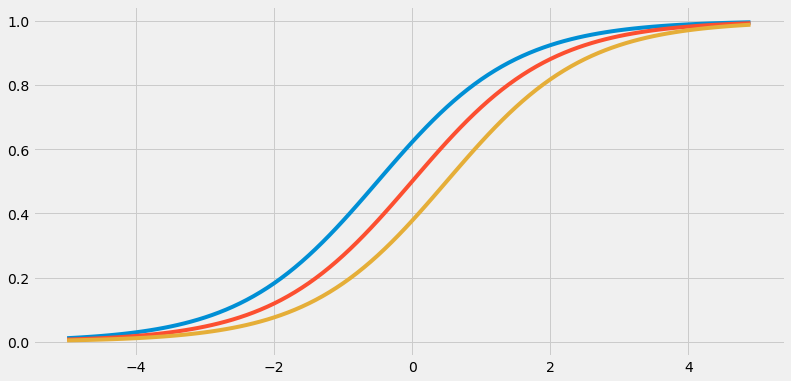

In [285]:
plt.figure(figsize=(12, 6))


y_1 = sigmoid(1 * x + 0.5)
y_2 = sigmoid(1 * x)
y_3 = sigmoid(1 * x - 0.5)

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)

In [288]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader

In [297]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [396]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __getitem__(self, idx):
        x = self.x[idx]
        y = self.y[idx]

        return x, y
    def __len__(self):
        return len(self.x)

In [397]:
dataset = CustomDataset(x_train, y_train)
loader = DataLoader(dataset, batch_size=2, shuffle=True)

In [413]:
weight = torch.ones((2, 1), requires_grad=True)
bias = torch.ones(1, requires_grad=True)

In [414]:
sigmoid = 1 / (1 + torch.exp(-(x_train.matmul(weight) + bias)))
# or
sigmoid = torch.sigmoid(x_train.matmul(weight) + bias)

In [415]:
loss = (y_train * torch.log(sigmoid) + (1 - y_train) * torch.log((1 - sigmoid))).sum() / (-1 * len(y_train))
#or
loss = F.binary_cross_entropy(sigmoid, y_train)

In [416]:
optimizer = optim.SGD([weight, bias], lr = 1)

In [417]:
nb_epochs = 1000
cost_ls = []
for epoch in range(0, nb_epochs):
    for batch_idx, samples in enumerate(loader):
        x, y = samples
        prediction = torch.sigmoid(-1 * (x.matmul(weight) + bias))
        cost = F.binary_cross_entropy(prediction, y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if epoch % 100 == 0 and batch_idx == 0:
            print(f'Epoch: {epoch}\nCost: {cost}')
        
        cost_ls.append(cost)

Epoch: 0
Cost: 4.003525733947754
Epoch: 100
Cost: 0.04032712057232857
Epoch: 200
Cost: 0.017593318596482277
Epoch: 300
Cost: 0.0004423578502610326
Epoch: 400
Cost: 8.127425098791718e-05
Epoch: 500
Cost: 0.010186283849179745
Epoch: 600
Cost: 0.00876968540251255
Epoch: 700
Cost: 0.00014461809769272804
Epoch: 800
Cost: 0.00013010160182602704
Epoch: 900
Cost: 0.007206826005131006


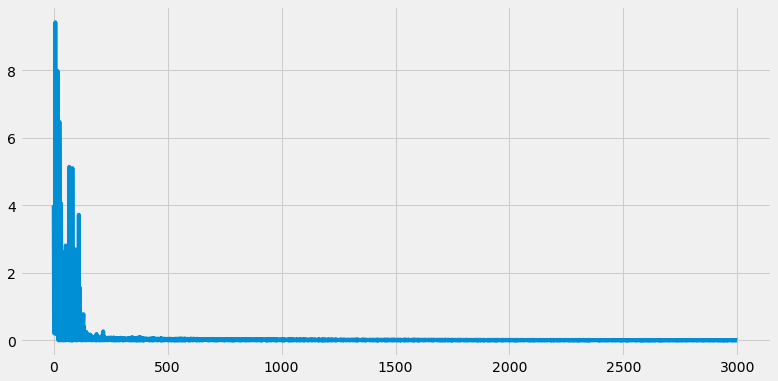

In [418]:
plt.figure(figsize=(12, 6))
plt.plot(cost_ls)

In [421]:
weight, bias

(tensor([[-4.4701],
         [-2.1516]], requires_grad=True),
 tensor([19.9944], requires_grad=True))

### nn.Module로 구현하는 로지스틱

In [451]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [452]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [453]:
model = nn.Sequential(nn.Linear(x_train.shape[1], 1),
                     nn.Sigmoid()
                     )

In [454]:
model(x_train) # weight, bias는 랜덤

tensor([[0.5758],
        [0.6898],
        [0.5539],
        [0.7443],
        [0.7691],
        [0.7270]], grad_fn=<SigmoidBackward>)

In [455]:
optimizer = optim.SGD(model.parameters(), lr = 1)

In [456]:
nb_epochs = 1000
for epoch in range(nb_epochs):
    
    prediction = model(x_train)
    
    cost = F.binary_cross_entropy(prediction, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        bool_ = prediction >= torch.FloatTensor([0.5])
        correct = bool_.float() == y_train
        
        accuracy = correct.sum().item() / len(correct)
        
        print(f'Epoch: {epoch}\nCost: {cost}\nAccuracy: {accuracy}')

Epoch: 0
Cost: 0.6186755299568176
Accuracy: 0.5
Epoch: 10
Cost: 0.5118498206138611
Accuracy: 0.6666666666666666
Epoch: 20
Cost: 0.4001365900039673
Accuracy: 0.8333333333333334
Epoch: 30
Cost: 0.3377891778945923
Accuracy: 0.8333333333333334
Epoch: 40
Cost: 0.285237580537796
Accuracy: 0.8333333333333334
Epoch: 50
Cost: 0.23781073093414307
Accuracy: 1.0
Epoch: 60
Cost: 0.1959010362625122
Accuracy: 1.0
Epoch: 70
Cost: 0.16518338024616241
Accuracy: 1.0
Epoch: 80
Cost: 0.14855314791202545
Accuracy: 1.0
Epoch: 90
Cost: 0.13794220983982086
Accuracy: 1.0
Epoch: 100
Cost: 0.12897205352783203
Accuracy: 1.0
Epoch: 110
Cost: 0.12111958861351013
Accuracy: 1.0
Epoch: 120
Cost: 0.11418545246124268
Accuracy: 1.0
Epoch: 130
Cost: 0.10801747441291809
Accuracy: 1.0
Epoch: 140
Cost: 0.10249555855989456
Accuracy: 1.0
Epoch: 150
Cost: 0.09752308577299118
Accuracy: 1.0
Epoch: 160
Cost: 0.09302181005477905
Accuracy: 1.0
Epoch: 170
Cost: 0.08892744779586792
Accuracy: 1.0
Epoch: 180
Cost: 0.08518698811531067
Acc

In [460]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2580, 1.5206]], requires_grad=True), Parameter containing:
tensor([-14.5050], requires_grad=True)]


### 클래스로 모델 구현

In [601]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [602]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [603]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [604]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data
    def __len__(self):
        return len(self.x_data)
    def __getitem__(self, idx):
        x = self.x_data[idx]
        y = self.y_data[idx]

In [605]:
batch_size = 3
data_set = CustomDataSet(x_train, y_train)
loader = DataLoader(data_set, batch_size=batch_size, shuffle=True)

In [606]:
model = BinaryClassifier()
optimizer = optim.SGD(model.parameters(), lr=1)

In [607]:
nb_epochs = 2000

for epoch in range(nb_epochs):
    for batch_idx, samples in enumerate(loader):
        x, y = samples
        prediction = model(x)
        cost = F.binary_cross_entropy(prediction, y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
    if epoch % 10 == 0:
        print(f'Epoch: {epoch}\nCost: {cost}')

Epoch: 0
Cost: 0.9676098823547363
Epoch: 10
Cost: 0.07208403199911118
Epoch: 20
Cost: 1.7144330739974976
Epoch: 30
Cost: 0.36359965801239014
Epoch: 40
Cost: 1.3287781476974487
Epoch: 50
Cost: 0.28005579113960266
Epoch: 60
Cost: 0.12645737826824188
Epoch: 70
Cost: 0.28285130858421326
Epoch: 80
Cost: 0.08907715231180191
Epoch: 90
Cost: 0.11566413193941116
Epoch: 100
Cost: 0.10684013366699219
Epoch: 110
Cost: 0.032107651233673096
Epoch: 120
Cost: 0.06489118188619614
Epoch: 130
Cost: 0.06073429062962532
Epoch: 140
Cost: 0.0762014165520668
Epoch: 150
Cost: 0.0748269334435463
Epoch: 160
Cost: 0.03214871510863304
Epoch: 170
Cost: 0.05056481435894966
Epoch: 180
Cost: 0.024596288800239563
Epoch: 190
Cost: 0.022471779957413673
Epoch: 200
Cost: 0.02696356736123562
Epoch: 210
Cost: 0.051111746579408646
Epoch: 220
Cost: 0.05164385959506035
Epoch: 230
Cost: 0.05364230275154114
Epoch: 240
Cost: 0.039211712777614594
Epoch: 250
Cost: 0.019541272893548012
Epoch: 260
Cost: 0.030788660049438477
Epoch: 270

In [610]:
list(model.parameters())

[Parameter containing:
 tensor([[4.6478, 2.2400]], requires_grad=True),
 Parameter containing:
 tensor([-20.8228], requires_grad=True)]

### 소프트맥스 회귀의 비용함수 구현하기

In [713]:
import torch
import torch.nn.functional as F

In [714]:
z = torch.FloatTensor([1, 2, 3])

prediction = F.softmax(z, dim=0)
print(prediction)
print(prediction.sum())

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


In [722]:
z = torch.randn(3, 5, requires_grad=True)

prediction = F.softmax(z, dim=1)

In [728]:
y = torch.randint(5, (3, )).long()

In [729]:
y_one_hot = torch.zeros_like(prediction)
y_one_hot = y_one_hot.scatter(1, y.unsqueeze(1), 1)

In [730]:
cost = (y_one_hot * -torch.log(prediction)).sum(1).mean()
cost

tensor(1.8889, grad_fn=<MeanBackward0>)

In [731]:
cost = (y_one_hot * -F.log_softmax(z, 1)).sum(1).mean()
cost

tensor(1.8889, grad_fn=<MeanBackward0>)

In [734]:
cost = F.nll_loss(F.log_softmax(z, 1), y)
cost

tensor(1.8889, grad_fn=<NllLossBackward>)

In [736]:
F.cross_entropy(z, y)

tensor(1.8889, grad_fn=<NllLossBackward>)

### 소프트맥스 회귀

In [840]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [841]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [842]:
label_num = len(set(y_train.numpy()))
y_one_hot = torch.zeros(x_train.shape[0], label_num)
y_one_hot = y_one_hot.scatter(1, y_train.unsqueeze(1), 1)

In [843]:
weight = torch.zeros(x_train.shape[1], label_num, requires_grad=True)
bias = torch.zeros(1, requires_grad=True)

In [844]:
optimizer = optim.SGD([weight, bias], lr=0.1)

In [845]:
nb_epochs = 1000

for epoch in range(nb_epochs):
    
#     prediction = F.softmax(, dim=1)
    cost = F.cross_entropy(x_train.matmul(weight) + bias, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

In [846]:
prediction = F.softmax(x_train.matmul(weight) + bias, dim=1)
prediction

tensor([[1.5171e-03, 2.3140e-02, 9.7534e-01],
        [2.2182e-02, 2.1552e-01, 7.6229e-01],
        [1.9853e-05, 3.0629e-01, 6.9369e-01],
        [4.6897e-05, 5.0356e-01, 4.9639e-01],
        [6.6322e-01, 2.9114e-01, 4.5647e-02],
        [3.4381e-01, 6.5618e-01, 3.1115e-06],
        [8.7086e-01, 1.2901e-01, 1.2303e-04],
        [9.4367e-01, 5.6321e-02, 8.7894e-06]], grad_fn=<SoftmaxBackward>)

In [849]:
model = nn.Linear(x_train.shape[1], label_num)

Linear(in_features=4, out_features=3, bias=True)

In [850]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000

for epoch in range(nb_epochs):
    
    prediction = model(x_train)
    
    cost = F.cross_entropy(prediction, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

### MNIST with Softmax

In [978]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

from torch.utils.data import DataLoader, Dataset

In [979]:
USE_CUDA = torch.cuda.is_available()
device = torch.device('cuda' if USE_CUDA else 'cpu')
print(f'다음 기기로 학습합니다: {device}')

다음 기기로 학습합니다: cuda


In [980]:
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
    
training_epoch = 15
batch_size = 100

In [981]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [982]:
list(mnist_train[0][0].squeeze().shape)

[28, 28]

In [983]:
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

linear_model = nn.Linear(28 * 28, len(mnist_train.classes), bias=True).to(device)

In [984]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(linear_model.parameters(), lr=0.1)

In [985]:
for epoch in range(training_epoch):
    avg_cost_for_epoch = 0
    total_batch = len(train_loader)
    
    for x, y in train_loader:
        x = x.view(-1, 28 * 28).to(device)
        y = y.to(device)
        optimizer.zero_grad()

        prediction = linear_model(x)
        loss = criterion(prediction, y)
        
        loss.backward()
        optimizer.step()
        
        avg_cost_for_epoch += loss / total_batch
        
        corret_prediction = torch.argmax(prediction) == y
        accuracy = corret_prediction.float().mean()
        
    print(f'Epoch: {epoch}\nCost: {avg_cost_for_epoch}, Accuracy: {accuracy}')

Epoch: 0
Cost: 0.5354684591293335, Accuracy: 0.0
Epoch: 1
Cost: 0.3592741787433624, Accuracy: 0.0
Epoch: 2
Cost: 0.33118751645088196, Accuracy: 0.0
Epoch: 3
Cost: 0.3165780305862427, Accuracy: 0.0
Epoch: 4
Cost: 0.3071581721305847, Accuracy: 0.0
Epoch: 5
Cost: 0.30018070340156555, Accuracy: 0.0
Epoch: 6
Cost: 0.29513019323349, Accuracy: 0.0
Epoch: 7
Cost: 0.29085150361061096, Accuracy: 0.0
Epoch: 8
Cost: 0.28741708397865295, Accuracy: 0.0
Epoch: 9
Cost: 0.2843795418739319, Accuracy: 0.0
Epoch: 10
Cost: 0.2818252146244049, Accuracy: 0.0
Epoch: 11
Cost: 0.2798007130622864, Accuracy: 0.0
Epoch: 12
Cost: 0.2778089940547943, Accuracy: 0.0
Epoch: 13
Cost: 0.2761543095111847, Accuracy: 0.0
Epoch: 14
Cost: 0.27444082498550415, Accuracy: 0.0


In [988]:
with torch.no_grad():
    x_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    y_test = mnist_test.test_labels.to(device)
    
    prediction = linear_model(x_test)
    corret_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = corret_prediction.float().mean()
    print(accuracy)

tensor(0.8863, device='cuda:0')


### DNN

In [1011]:
import torch
import torch.nn as nn
import torch.optim as optim

In [1012]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)

if device == 'cuda':
    torch.cuda.manual_seed(777)

In [1013]:
x = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [1014]:
model = nn.Sequential(nn.Linear(x.shape[1], 1),
                     nn.Sigmoid()).to(device)

In [1015]:
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 10000

In [1016]:
for epoch in range(nb_epochs):
    optimizer.zero_grad()
    prediction = model(x)
    
    loss = criterion(prediction, y)
    
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print(epoch, cost.item())

0 0.25100263953208923
1000 0.25100263953208923
2000 0.25100263953208923
3000 0.25100263953208923
4000 0.25100263953208923
5000 0.25100263953208923
6000 0.25100263953208923
7000 0.25100263953208923
8000 0.25100263953208923
9000 0.25100263953208923


In [1018]:
model(torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device))

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], device='cuda:0', grad_fn=<SigmoidBackward>)

### MLP

In [1040]:
import torch
import torch.nn as nn
import torch.optim as optim

In [1041]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproductibility!!!!!
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [1042]:
x = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [1046]:
model = nn.Sequential(
                        nn.Linear(x.shape[1], 10),
                        nn.Sigmoid(),
                        nn.Linear(10, 10),
                        nn.Sigmoid(),
                        nn.Linear(10, 10),
                        nn.Sigmoid(),
                        nn.Linear(10, 1),
                        nn.Sigmoid()).to(device)

In [1047]:
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=1)

In [1048]:
for epoch in range(10001):
    
    optimizer.zero_grad()
    prediction = model(x)
    
    loss = criterion(prediction, y)
    
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print(loss.item())

0.7053053379058838
0.6931278109550476
0.6931001543998718
0.6930091381072998
0.6920581459999084
0.0025826464407145977
0.0006092588882893324
0.0003335595247335732
0.0002271050470881164
0.00017133360961452127
0.00013708535698242486


In [1050]:
model(x)

tensor([[1.3903e-04],
        [9.9988e-01],
        [9.9988e-01],
        [1.6712e-04]], device='cuda:0', grad_fn=<SigmoidBackward>)

### MLP with Hand-writing

In [1149]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from torch.utils.data import DataLoader, Dataset

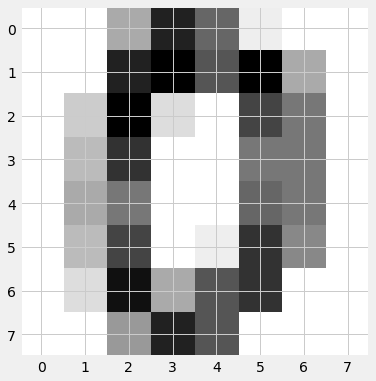

In [1179]:
plt.figure(figsize=(12, 6))

digits = load_digits()

plt.imshow(digits.images[0], cmap=plt.cm.gray_r)

In [1180]:
class_num = len(set(digits.target))
input_size = digits['data'][0].shape[0]

In [1181]:
model = nn.Sequential(nn.Linear(input_size, 32),
                     nn.ReLU(),
                     nn.Linear(32, 16),
                     nn.ReLU(),
                     nn.Linear(16, class_num)).to(device)

optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.CrossEntropyLoss().to(device)

In [1182]:
class CustomDataset:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __getitem__(self, idx):
        x = self.x[idx]
        y = self.y[idx]
        
        return x, y
    
    def __len__(self):
        return len(self.x)

In [1183]:
x = torch.FloatTensor(digits.data).to(device)
y = torch.LongTensor(digits.target).to(device)

In [1184]:
dset_ = CustomDataset(x, y)
loader = DataLoader(dset_, batch_size=32, shuffle=True, drop_last=True)

loss_ls = []

In [1185]:
for epoch in range(100):
    for x, y in loader:
        optimizer.zero_grad()
        prediction = model(x)
        
        loss = criterion(prediction, y)
        
        loss.backward()
        optimizer.step()
        
    if epoch % 10 == 0:
        print(f'Epoch: {epoch}\nCost: {loss}')
    loss_ls.append(loss)

Epoch: 0
Cost: 0.9686448574066162
Epoch: 10
Cost: 1.2178740501403809
Epoch: 20
Cost: 0.013019979000091553
Epoch: 30
Cost: 0.00014609098434448242
Epoch: 40
Cost: 0.00018766522407531738
Epoch: 50
Cost: 0.00020620226860046387
Epoch: 60
Cost: 0.0003706216812133789
Epoch: 70
Cost: 0.0005148947238922119
Epoch: 80
Cost: 0.00010508298873901367
Epoch: 90
Cost: 2.09808349609375e-05


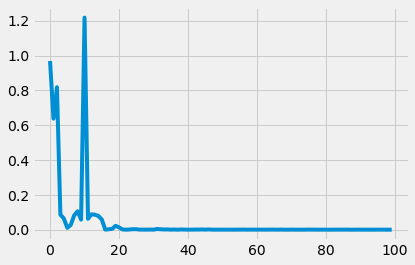

In [1186]:
plt.plot(loss_ls)

### Overfitting 예방

In [1392]:
class Architecture1(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Architecture1, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        
        return out

In [1393]:
x = torch.FloatTensor(digits.data).to(device)
y = torch.LongTensor(digits.target).to(device)

tensor(6, device='cuda:0')


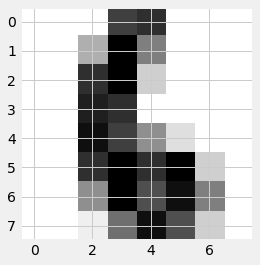

In [1394]:
i = 6
plt.imshow(x.view(-1, 8, 8)[i].cpu(), cmap=plt.cm.gray_r)
print(y[i])

In [1396]:
# model = Architecture1(x.shape[1], 10, class_num).to(device)

model = nn.Sequential(nn.Linear(x.shape[1], 10),
                     nn.ReLU(),
                     nn.Linear(10, 10),
                     nn.ReLU(),
                      nn.Dropout(0.5),
                     nn.Linear(10, 10)).to(device)

optimizer = optim.SGD(model.parameters(), lr=0.01)

criterion = nn.CrossEntropyLoss().to(device)

In [1397]:
loss_ls = []

In [1398]:
for epoch in range(1000):
    
    optimizer.zero_grad()
    
    prediction = model(x)
    
    loss = criterion(prediction, y)
    
    loss.backward()
    
    optimizer.step()
    
    loss_ls.append(loss.item())

In [1399]:
(torch.argmax(model(x), 1) == y).float().mean()

tensor(0.5620, device='cuda:0')

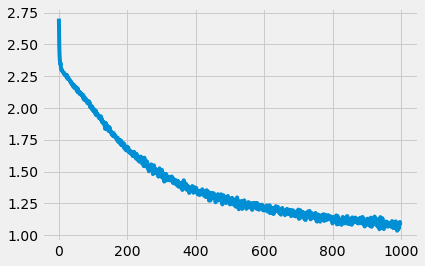

In [1400]:
plt.plot(loss_ls)